In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
import os
import pickle
import time

NAME = "HARVARD-HACK-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='harvard_hack_logs/{}'.format(NAME))
tboard_log_dir = os.path.join("harvard_hack_logs",NAME)
tensorboard = TensorBoard(log_dir = tboard_log_dir)

x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

x = x/255

model = Sequential()
#model.add(Conv2D(64, (3,3), input_shape = x.shape[1:], activation='relu'))
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))
          
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x,y,batch_size=32,epochs=5,validation_split = 0.1, callbacks=[tensorboard])

model.save('models/wasteclassifier', overwrite=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20307 samples, validate on 2257 samples
Epoch 1/5
20307/20307 [==============================] - 495s 24ms/sample - loss: 0.5974 - acc: 0.6779 - val_loss: 0.5303 - val_acc: 0.7523
Epoch 2/5
20307/20307 [==============================] - 500s 25ms/sample - loss: 0.5048 - acc: 0.7571 - val_loss: 0.5118 - val_acc: 0.7669
Epoch 3/5
20307/20307 [==============================] - 490s 24ms/sample - loss: 0.4478 - acc: 0.7940 - val_loss: 0.4794 - val_acc: 0.7745
Epoch 4/5
20307/20307 [==============================] - 495s 24ms/sample - loss: 0.3828 - acc: 0.8321 - val_loss: 0.4995 - val_acc: 0.7816
Epoch 5/5
20307/20307 [==============================] - 491s 24ms/sample - loss: 0.2940 - acc: 0.8733 - val_loss: 0.5470 - val_acc: 0.7900


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10)
model.fit(x_train, y_train)
y_pred = model.predict_classes(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

20307/20307 [==============================] - 464s 23ms/sample - loss: 0.3294 - acc: 0.8622
0.8626495347806823
[[1122  135]
 [ 175  825]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1257
           1       0.86      0.82      0.84      1000

    accuracy                           0.86      2257
   macro avg       0.86      0.86      0.86      2257
weighted avg       0.86      0.86      0.86      2257



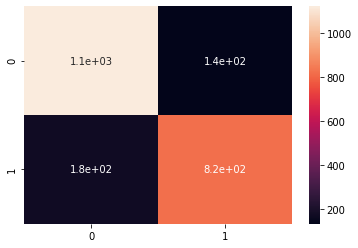

In [9]:
import seaborn as sns
import sklearn.metrics as metrics
cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [2]:
# Save the Model Weights
model.save_weights('model.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.
